In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
geant4_name = "improved_200cells_FPCD.hdf5"
#diffusion_name = "GSGM_MaskedMean.h5"
diffusion_name = "GSGM.h5"

g4 = h5py.File(geant4_name, 'r')
dfsn = h5py.File(diffusion_name,'r')

g4.keys()
#dfsn.keys()

nevts = 10_000

(array([1.60000e+01, 2.40000e+01, 1.33000e+02, 6.78000e+02, 1.00770e+04,
        1.91998e+05, 4.37478e+05, 5.06610e+05, 4.58118e+05, 1.88568e+05]),
 array([-4.436269  , -3.9482012 , -3.4601336 , -2.972066  , -2.4839983 ,
        -1.9959306 , -1.5078629 , -1.0197953 , -0.5317276 , -0.04365998,
         0.44440767], dtype=float32),
 <BarContainer object of 10 artists>)

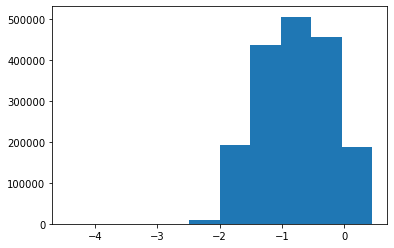

In [3]:
plt.hist((np.log10(g4['cluster'][:,2])))

In [4]:
print(np.shape(dfsn['cell_features']))
print(np.shape(g4['hcal_cells']))

(10000, 200, 4)
(1793700, 200, 5)


In [5]:
g4_cellsE = np.ravel(g4['hcal_cells'][:nevts,:,0])
dfsn_cellsE = np.ravel(dfsn['cell_features'][:,:,0])

mask = g4_cellsE != 0.0
mask_dfsn = dfsn_cellsE != 0



In [6]:
print(np.min(dfsn_cellsE[mask_dfsn]))

-0.7043046452392707


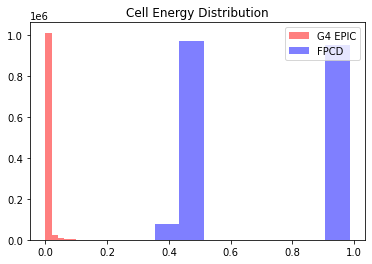

In [7]:
cellsE_bins = np.linspace(0,0.001,20)
plt.hist(np.ravel(g4_cellsE[mask]),alpha=0.5,label="G4 EPIC",color="red")
plt.hist(np.ravel(10**dfsn_cellsE[mask_dfsn]),alpha=0.5,label="FPCD",color="blue")
#plt.ylim(0,0.2e6)
plt.legend()
_ = plt.title("Cell Energy Distribution")
plt.savefig("CellE.pdf")

In [8]:
print(g4_cellsE[mask]==0)

[False False False ... False False False]


#x_mask = (dfsn_cellsX[dfsn_cellsX<-100])
x_mask = np.abs(dfsn_cellsX)>100

#x_mask = (dfsn_cellsX[dfsn_cellsX>100])
#np.append(x_mask,(dfsn_cellsX[dfsn_cellsX>100]))
#np.concatenate((x_mask,dfsn_cellsX[dfsn_cellsX>100]),axis=0)
plt.hist(dfsn_cellsX[x_mask],bins=150)

-100.0


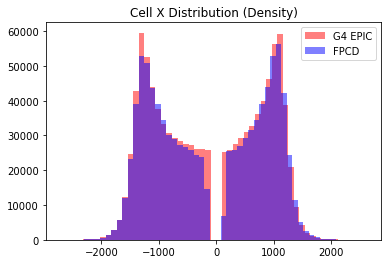

In [10]:
g4_cellsX = np.ravel(g4['hcal_cells'][:nevts,:,1])
dfsn_cellsX = np.ravel(dfsn['cell_features'][:,:,1])

g4_cellsX = g4_cellsX[g4_cellsX != 0]
dfsn_cellsX = dfsn_cellsX[dfsn_cellsX != 0]
g4_xmask = (g4_cellsX)< 0
print(np.max(g4_cellsX[g4_xmask]))
#cellsE_bins = np.linspace(0,0.001,1000)
x_mask = np.abs(dfsn_cellsX)>=150

plt.hist(np.ravel(g4_cellsX),bins=55,alpha=0.5,label="G4 EPIC",color="red",density=False)
plt.hist(np.ravel(dfsn_cellsX[x_mask]),bins=55,alpha=0.5,label="FPCD",color="blue",density=False)
plt.legend()
_ = plt.title("Cell X Distribution (Density)")
plt.savefig("CellX.pdf")

[-2700. -2600. -2500. -2400. -2300. -2200. -2100. -2000. -1900. -1800.
 -1700. -1600. -1500. -1400. -1300. -1200. -1100. -1000.  -900.  -800.
  -700.  -600.  -500.  -400.  -300.  -200.  -100.   100.   200.   300.
   400.   500.   600.   700.   800.   900.  1000.  1100.  1200.  1300.
  1400.  1500.  1600.  1700.  1800.  1900.  2000.  2100.  2200.  2300.
  2400.  2500.  2600.]
[3821.5 3844.9 3868.3 3891.7 3915.1 3938.5 3961.9 3985.3 4008.7 4032.1
 4055.5 4078.9 4102.3 4125.7 4149.1 4172.5 4195.9 4219.3 4242.7 4266.1
 4289.5 4312.9 4336.3 4359.7 4383.1 4406.5 4429.9 4453.3 4476.7 4500.1
 4523.5 4546.9 4570.3 4593.7 4617.1 4640.5 4663.9 4687.3 4710.7 4734.1
 4757.5 4780.9 4804.3 4827.7 4851.1 4874.5 4897.9 4921.3 4944.7 4968.1
 4991.5 5014.9 5038.3 5061.7 5085.1]


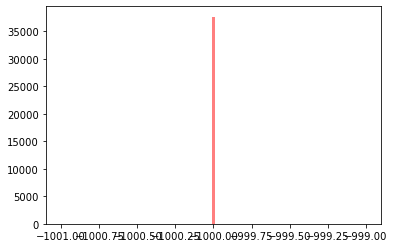

In [20]:
#plt.hist(np.ravel(dfsn_cellsX),bins=np.linspace,alpha=0.5,label="FPCD",color="blue")
#_ = plt.hist(np.ravel(g4_cellsX),bins=np.linspace(-2700,-90,260),alpha=0.5,label="G4 EPIC",color="red")
#_ = plt.hist(np.ravel(g4_cellsX),bins=np.linspace(-2700,-0,270),alpha=0.5,label="G4 EPIC",color="green")

_ = plt.hist(np.ravel(g4_cellsX),bins=np.linspace(-1001,-999,100),alpha=0.5,label="G4 EPIC",color="red")
unique_X = np.unique(g4_cellsX)
print(unique_X)
unique_Z = np.unique(g4_cellsZ)
print(unique_Z)


In [12]:
g4_test = g4_cellsX[g4_cellsX<0]
print(np.max(g4_test))

-100.0


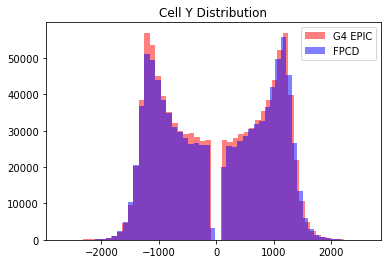

In [13]:
g4_cellsY = np.ravel(g4['hcal_cells'][:nevts,:,2])
dfsn_cellsY = np.ravel(dfsn['cell_features'][:,:,2])

g4_cellsY = g4_cellsY[g4_cellsY != 0]
dfsn_cellsY = dfsn_cellsY[dfsn_cellsY != 0]

y_mask = np.abs(dfsn_cellsY)>=100

#cellsE_bins = np.linspace(0,0.001,1000)
plt.hist(np.ravel(g4_cellsY),bins=55,alpha=0.5,label="G4 EPIC",color="red")
plt.hist(np.ravel(dfsn_cellsY[y_mask]),bins=55,alpha=0.5,label="FPCD",color="blue")
plt.legend()
_ = plt.title("Cell Y Distribution")
plt.savefig("CellY.pdf")

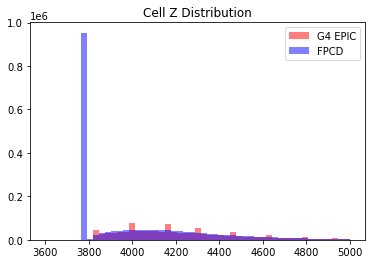

In [19]:
g4_cellsZ = np.ravel(g4['hcal_cells'][:nevts,:,3])
dfsn_cellsZ = np.ravel(dfsn['cell_features'][:,:,3])

g4_cellsZ = g4_cellsZ[g4_cellsZ != 0]
dfsn_cellsZ = dfsn_cellsZ[dfsn_cellsZ != 0]

cellsz_bins = np.linspace(3600,5000,52)
plt.hist(np.ravel(g4_cellsZ),bins=cellsz_bins,alpha=0.5,label="G4 EPIC",color="red")
plt.hist(np.ravel(dfsn_cellsZ),bins=cellsz_bins,alpha=0.5,label="FPCD",color="blue")
plt.legend()
_ = plt.title("Cell Z Distribution")
plt.savefig("CellZ.pdf")

In [ ]:
g4_NCells = np.ravel(g4['cluster'][:nevts,-2])
dfsn_NCells = np.ravel(dfsn['cluster_features'][:,-2])
                       
plt.hist(np.ravel(g4_NCells),alpha=0.5,label="G4 EPIC",color="red")
plt.hist(np.ravel(dfsn_NCells),alpha=0.5,label="FPCD",color="blue")
plt.legend()
plt.title("Cluster Sum E")
plt.savefig("ClusterSumE.pdf")

In [ ]:
g4_Esum = np.ravel(g4['cluster'][:nevts,3])
dfsn_Esum = np.ravel(dfsn['cluster_features'][:,-1])
                       
plt.hist(np.ravel(g4_Esum),bins=20,alpha=0.5,label="G4 EPIC",color="red")
plt.hist(np.ravel(dfsn_Esum),bins=20,alpha=0.5,label="FPCD",color="blue")
plt.legend()
plt.title("Cluster Sum")
plt.savefig("ClusterSums.pdf")